In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# permite que se mostre os gráficos nesse ambiente
%matplotlib inline 

In [24]:
#recebendo dados

viga = float(input("Digite o comprimento da Viga (m):"))

while viga <= 0:
    print("    O  valor de comprimento nao pode ser 0 ou negativo! Tente novamente")
    viga = float(input("Digite o comprimento da Viga (m):"))

else:
    print("    Comprimento da viga registrado!")

    
Fp = float(input("Digite o valor da carga concentrada (N):"))

while Fp <= 0:
    print("    O  valor de carga nao pode ser 0 ou negativo! Tente novamente")
    Fp = float(input("Digite o valor da carga concentrada (N):"))

else:
    print("    Valor da carga concentrada registrado!")


Fpx = float(input("Digite a posicao da carga concentrada (m):"))

while Fpx > viga:
    print("    A posicao da carga concentrada nao pode fora da extensao da viga! Tente novamente")
    Fpx = float(input("Digite a posicao da carga concentrada (m):"))

else:
    print("    Posicao da carga concentrada registrada!")
    
Ft = float(input("Digite o valor maximo da carga distribuida (N):"))
while Ft <= 0:
    print("    O  valor de carga nao pode ser 0 ou negativo! Tente novamente")
    Ft = float(input("Digite o valor da carga concentrada (N):"))

else:
    print("    Valor da carga distribuida registrado!")

Ftx = float(input("Digite a posicao final da carga distribuida (m):"))

while Ftx > viga:
    print("    A posicao final da carga distribuida nao pode fora da extensao da viga! Tente novamente")
    Ftx = float(input("Digite a posicao final da carga distribuida (m):"))

else:
    print("    Posicao da carga distribuida registrada!")
    


Digite o comprimento da Viga (m):10
    Comprimento da viga registrado!
Digite o valor da carga concentrada (N):-3
    O  valor de carga nao pode ser 0 ou negativo! Tente novamente
Digite o valor da carga concentrada (N):10
    Valor da carga concentrada registrado!
Digite a posicao da carga concentrada (m):10
    Posicao da carga concentrada registrada!
Digite o valor maximo da carga distribuida (N):10
    Valor da carga distribuida registrado!
Digite a posicao final da carga distribuida (m):5
    Posicao da carga distribuida registrada!


In [25]:
#calcula reacao do apoio
def ReacaoV(b,h,c):
    return b*h/2 + c

print("A reacao de apoio cortante tem valor(N):", ReacaoV(Ftx, Ft, Fp))

A reacao de apoio cortante tem valor(N): 35.0


In [5]:
#forca distribuida -> ponto

fmed= (Ft*Ftx)/2
print("O valor equivalente da carga distribuida para um ponto (N):", fmed)

xmed = Ftx/3
print("A posição de aplicação equivalente da carga distribuida (m):", xmed)

def ReacaoM(a,b,c,d):
    return a*b + c*d
print("A reacao de apoio de momento tem valor(N*m):", ReacaoM(fmed,xmed,Fp, Fpx))

#diagrama cortante

def W(a):  
    return(Ft*a - (Ft*a**2)/(2*Ftx))

def Cortante1(b): 
    return ReacaoV(Ftx, Ft, Fp) - W(b)
   

O valor equivalente da carga distribuida para um ponto (N): 25.0
A posição de aplicação equivalente da carga distribuida (m): 1.6666666666666667
A reacao de apoio de momento tem valor(N*m): 141.66666666666669


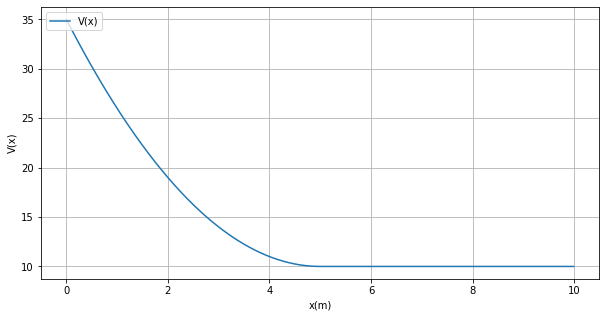

In [6]:
# Fazendo o gráfico da viga
import numpy as np                  # obtém acesso aos rápidos arrays da numpy 
import matplotlib.pyplot as plt     # Para fazer os gráficos das funções



x0 = 0              # Valor inicial de x
xf = viga      # Valor final de x
dx = 0.01            # Passo da discretização dx = (xf - x0)/(np-1)

x = np.arange(x0, xf, dx)                 # cria um vetor de dados x-data
y = Cortante1(x)                         # calcula o vetor de dados y-data

for i in range (0,len(x)):
   if x[i] > Ftx:
      y[i] = Fp

        
largura = 10  # Largura da figura
altura  = 5   # Altura da figura
plt.figure(figsize =(largura, altura))     # Define o tamanho do gráfico
plt.grid()                       # Habilita a grade 
plt.xlabel('x(m)')
plt.ylabel('V(x)')
plt.title('')
plt.plot(x, y, label="V(x)")   # Faz o gráfico      
plt.legend(loc="upper left")        # Habilita as legendas
plt.show()



In [7]:
#valor de V(x) em um ponto

valorV=float(input("Escolha um valor de x para saber o V(X): "))

if (valorV > viga) or (valorV < 0):
    while valorV > viga or (valorV < 0):
        print("    A posicao nao pode fora da extensao da viga! Tente novamente")
        valorV = float(input("Escolha um valor de x para saber o V(X):" ))
    else: print(Cortante1(valorV))
elif (valorV>=Ftx):
    while valorV > viga or (valorV < 0):
        print("    A posicao nao pode fora da extensao da viga! Tente novamente")
        valorV = float(input("Escolha um valor de x para saber o V(X):" ))
    else: print(Fp)


Escolha um valor de x para saber o V(X): 5
10.0


In [8]:
#diagrama momento
    
def M(a):
    v = ReacaoV(Ftx, Ft, Fp)
    m = ReacaoM(fmed,xmed,Fp,Fpx)
    terc= Ft/(6*Ftx)
    seg= -Ft/2    
    return ( seg*(a**2) + terc*(a**3) + v*a -m)

def M2(b):
    calc= Fp*(viga-Fpx) - (Ft*Ftx/2)*(viga-b-(Ftx/3))
    return calc

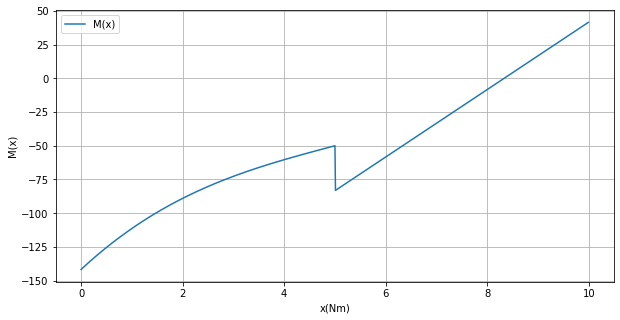

In [9]:
# Fazendo o gráfico da viga
import numpy as np                  
import matplotlib.pyplot as plt     



x0 = 0              # Valor inicial de x
xf = viga            # Valor final de x
dx = 0.01            # Passo da discretização dx = (xf - x0)/(np-1)

x = np.arange(x0, xf, dx)                 # cria um vetor de dados x-data
y = M(x)                         # calcula o vetor de dados y-data

for i in range (0,len(x)):
   if x[i] > Ftx:
      y[i] = M2(x[i])

        
largura = 10  # Largura da figura
altura  = 5   # Altura da figura
plt.figure(figsize =(largura, altura))     # Define o tamanho do gráfico
plt.grid()                       # Habilita a grade 
plt.xlabel('x(Nm)')
plt.ylabel('M(x)')
plt.title('')
plt.plot(x, y, label="M(x)")   # Faz o gráfico      
plt.legend(loc="upper left")        # Habilita as legendas
plt.show()


In [14]:
#valor de M(x) em um ponto

valorM=float(input("Escolha um valor de x para saber o M(X): "))

if (valorM==viga):
    print("Na borda:", M2(viga))

if (valorM==Ftx):
    print("Na quina:", M(valorM))

if (valorM > viga) or (valorM <= 0):
    while valorM > viga or valorM < 0 :
        print("    A posicao nao pode fora da extensao da viga! Tente novamente")
        valorM = float(input("Escolha um valor de x para saber o M(X):" ))
        if(valorM<Ftx) and (valorM!=0):
            print("Dentro da distribluida", M(valorM))
        elif (valorM>Ftx):
            print("Fora da distribuida:", M2(valorM))
    else:
        if (valor!=viga):
            print("No zero:", M(0))

Escolha um valor de x para saber o M(X): 5
Na quina: -50.00000000000003


In [21]:
#entradas para tensao

geo=int(input("Escolha uma configuracao de geometria, digitando 1 ou 2: "))

while geo > 2 :
    geo=int(input("    Escolha invalida, digite 1 ou 2: "))

while geo < 0 :
    geo=int(input("    Escolha invalida, digite 1 ou 2: "))

if (geo == 1):
    print("Geometria retangular da secao transversal foi escolhida!")
elif (geo == 2):
        print("Geometria I da secao transversal foi escolhida!")
        
#dimensoes 

h=float(input("Digite a altura h da secao transversal (cm): "))

while h <= 0 :
    h=float(input("    Escolha invalida, digite um numero positivo nao nulo (cm): "))

l=float(input("Digite a largura l da secao transversal (cm): "))

while l <= 0 :
    l=float(input("    Escolha invalida, digite um numero positivo nao nulo (cm): "))
    
if geo==2:
    hlinha=float(input("Digite a altura h' da secao transversal (cm): "))
    while hlinha <= 0 :
        hlinha=float(input("    Escolha invalida, digite um numero positivo nao nulo (cm): "))



Escolha uma configuracao de geometria, digitando 1 ou 2: 2
Geometria I da secao transversal foi escolhida!
Digite a altura h da secao transversal (cm): 10
Digite a largura l da secao transversal (cm): 10
Digite a altura h' da secao transversal (cm): 2


In [23]:
if geo==1:
    inercia= (h*l*l*l)/12

if geo==2:
    hmenos=h-(2*hlinha)
    inercia= (h*h*l - (l-hlinha) - (hmenos)**3)/12
    
inercia

64.66666666666667

In [17]:
inercia

337.3333333333333